In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

11.218573073031095 -31.00555657455078
51.47363725151183 -2.9010430280316086
-71.97650584705146 168.98815945350628
-32.834755416103725 -120.77108083139916
-16.933052080141778 -120.061852742136
-10.965635059845866 156.1877538986916
80.80689887708704 -18.88824589272531
-61.26197448806671 -81.76317934017635
31.50621635120926 -36.90752349185357
26.439480107148796 179.1076806414966
-51.39089426046631 -117.64788112991586
-15.623017106374789 79.85740368412439
-41.931919939154135 11.460117197337297
-16.934647247294563 131.72828177221413
-31.66758433799407 167.47452167325656
87.76281953888261 -128.7870770101508
22.845008505370714 161.3579738354071
-34.61005572051782 -87.80837701896556
72.53982893735721 -151.52290237137666
-86.66732857751506 -86.72736102914088
76.56278783035322 -86.8888822853889
-88.97197746841923 95.20526766535528
-11.161712618636713 163.76939344746444
-33.88122456053027 -40.08237997045822
52.72713238015774 97.40312383145454
-13.248080423713802 23.174213843655195
13.172749687795

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
cities

['sao filipe',
 'clevedon',
 'bluff',
 'rikitea',
 'gizo',
 'illoqqortoormiut',
 'punta arenas',
 'ribeira grande',
 'butaritari',
 'hithadhoo',
 'cape town',
 'katherine',
 'ahipara',
 'tuktoyaktuk',
 'lebu',
 'barrow',
 'ushuaia',
 'qaanaaq',
 'albany',
 'kirakira',
 'laguna',
 'toora-khem',
 'zambezi',
 'iracoubo',
 'upernavik',
 'carnarvon',
 'kulhudhuffushi',
 'port alfred',
 'nawa',
 'mar del plata',
 'belushya guba',
 'sakakah',
 'mataura',
 'hilo',
 'namwala',
 'tuensang',
 'codrington',
 'chokurdakh',
 'terrace',
 'talnakh',
 'puerto ayora',
 'narsaq',
 'saint-philippe',
 'hermanus',
 'tasiilaq',
 'pevek',
 'suluktu',
 'vanimo',
 'taolanaro',
 'hobart',
 'bredasdorp',
 'chuy',
 'dudinka',
 'zonguldak',
 'jamestown',
 'saint-augustin',
 'komsomolskiy',
 'cherskiy',
 'airai',
 'umzimvubu',
 'waipawa',
 'avera',
 'torbay',
 'guane',
 'pimenteiras',
 'mlimba',
 'sao felix do xingu',
 'ketchikan',
 'kodiak',
 'qiryat shemona',
 'saint-joseph',
 'constitucion',
 'salinas',
 'okhotsk

In [9]:
import requests
requests.__version__

'2.26.0'

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [11]:
# URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | clevedon
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | gizo
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | butaritari
City not found. Skipping...
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | katherine
Processing Record 13 of Set 1 | ahipara
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | kirakira
Processing Record 21 of Set 1 | laguna
Processing Record 22 of S

Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | pontianak
Processing Record 41 of Set 4 | nova olinda do norte
Processing Record 42 of Set 4 | galashki
Processing Record 43 of Set 4 | meadow lake
Processing Record 44 of Set 4 | ondjiva
Processing Record 45 of Set 4 | adrar
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | teya
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | faanui
Processing Record 50 of Set 4 | madimba
Processing Record 1 of Set 5 | eastlake
Processing Record 2 of Set 5 | chhatarpur
Processing Record 3 of Set 5 | la oroya
Processing Record 4 of Set 5 | camocim
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | hokitika
Processing Record 7 of Set 5 | ohafia
Processing Record 8 of Set 5 | alta floresta
Processing Record 9 of Set 5 | fereydun kenar
Processing Record 10 of Set 5 | lompoc
Processing Record 11 of Set 5 | turan
Processing Record 12 of Set 5 | mapimi
Processing Record 1

In [18]:
# Print the city_data count to confirm sufficient count.
len(city_data)

556

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Maldonado,-34.6667,-54.9167,70.99,46,8,9.69,UY,2022-05-08 15:59:54
1,Ushuaia,-54.8000,-68.3000,40.66,87,75,35.68,AR,2022-05-08 15:58:44
2,Chokurdakh,70.6333,147.9167,8.04,92,99,6.53,RU,2022-05-08 15:58:40
3,Longyearbyen,78.2186,15.6401,17.85,71,18,16.24,SJ,2022-05-08 15:59:55
4,Deputatskiy,69.3000,139.9000,10.53,99,100,3.36,RU,2022-05-08 15:59:55
5,Lorengau,-2.0226,147.2712,83.37,74,92,13.62,PG,2022-05-08 15:59:56
6,Rikitea,-23.1203,-134.9692,76.51,80,42,21.25,PF,2022-05-08 15:59:56
7,Bengkulu,-3.8004,102.2655,78.42,82,95,4.03,ID,2022-05-08 15:55:19
8,Mataura,-46.1927,168.8643,47.48,98,92,0.98,NZ,2022-05-08 15:55:19
9,Chulym,55.0997,80.9572,39.54,79,61,2.89,RU,2022-05-08 15:59:57


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maldonado,UY,2022-05-08 15:59:54,-34.6667,-54.9167,70.99,46,8,9.69
1,Ushuaia,AR,2022-05-08 15:58:44,-54.8000,-68.3000,40.66,87,75,35.68
2,Chokurdakh,RU,2022-05-08 15:58:40,70.6333,147.9167,8.04,92,99,6.53
3,Longyearbyen,SJ,2022-05-08 15:59:55,78.2186,15.6401,17.85,71,18,16.24
4,Deputatskiy,RU,2022-05-08 15:59:55,69.3000,139.9000,10.53,99,100,3.36
...,...,...,...,...,...,...,...,...,...
551,Pakxan,LA,2022-05-08 16:17:04,18.3778,103.6601,76.64,79,86,3.06
552,Sur,OM,2022-05-08 16:17:05,22.5667,59.5289,88.75,50,0,2.46
553,Peniche,PT,2022-05-08 16:17:06,39.3558,-9.3811,79.29,61,69,11.27
554,Wanning,CN,2022-05-08 16:17:06,18.8003,110.3967,76.15,89,92,2.66


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

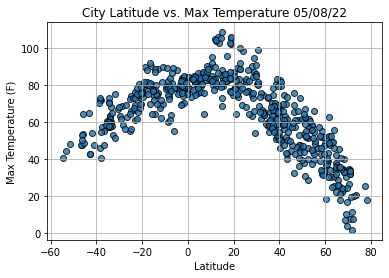

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

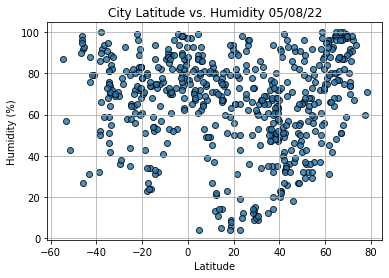

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

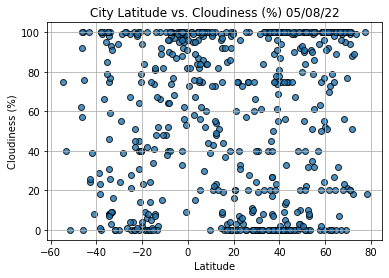

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

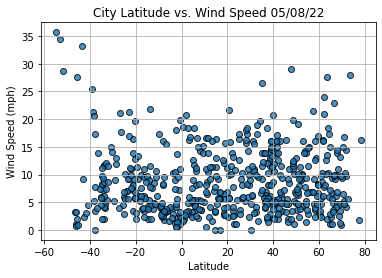

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

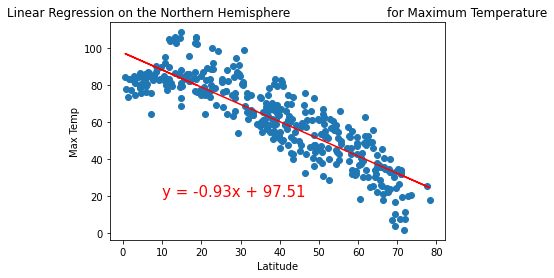

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

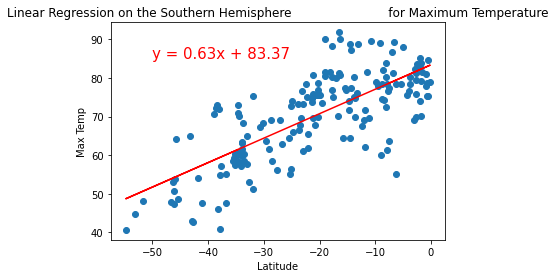

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

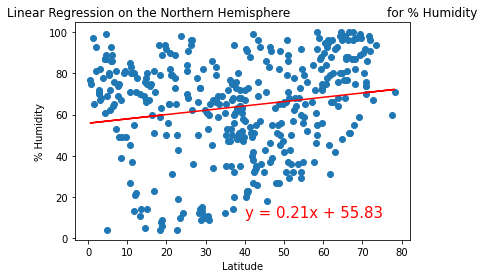

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

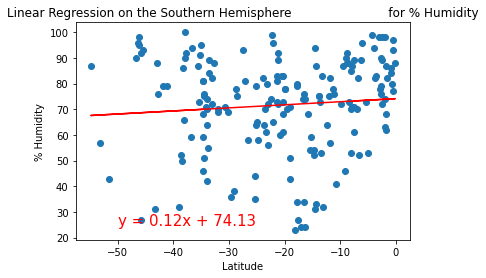

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,25))

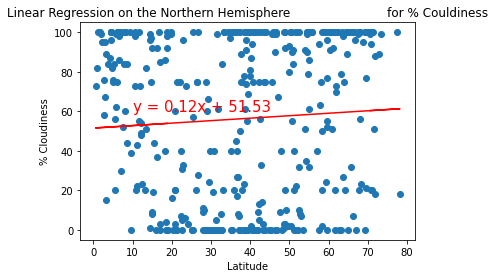

In [45]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Couldiness', '% Cloudiness',(10,60))

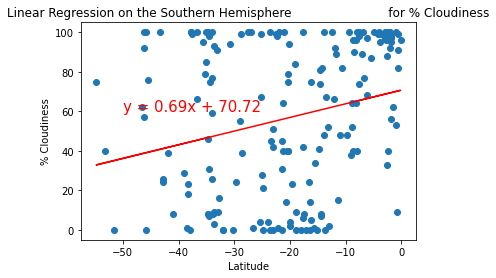

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

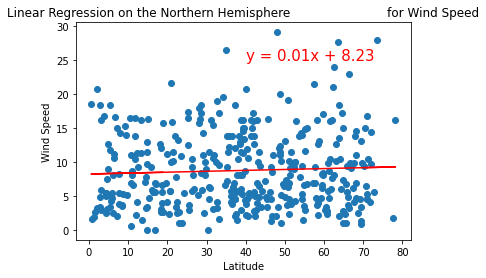

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

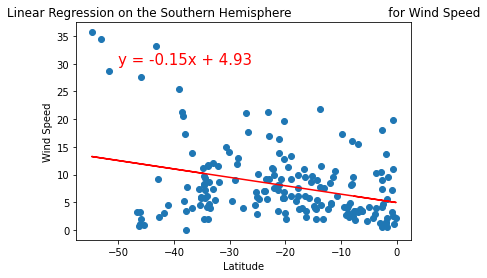

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))